## Importing Modules and Libraries

In [28]:
import pandas as pd
import warnings

In [29]:
warnings.filterwarnings('ignore')

In [6]:
import trainTestSplit
import dataPreprocess
import modelTraining
import modelEvaluation

In [7]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

## Reading the Data

In [8]:
data = pd.read_csv('/content/WineQT2.csv')

In [9]:
numerical_cols = data.drop(columns = ['Id','quality']).columns
target_col = 'quality'

## Train-Test Split

In [10]:
tts = trainTestSplit.TrainTestSplit(numerical_cols, target_col)

In [11]:
tts.split(data)

In [12]:
train_data = tts.data_train()
test_data = tts.data_test()

In [13]:
train_data.shape

(2173, 13)

## Data Preprocessing

In [14]:
dp = dataPreprocess.DataPreprocess(train_data, test_data,numerical_cols,target_col)

In [15]:
dp.handlingMissingValues()

'Since there are no NULL values, we will proceed with other processes.....'

In [16]:
train_data, test_data, class_labels = dp.transformData()

In [17]:
train_data = dp.dataScaling()

:::Box-Plot:::


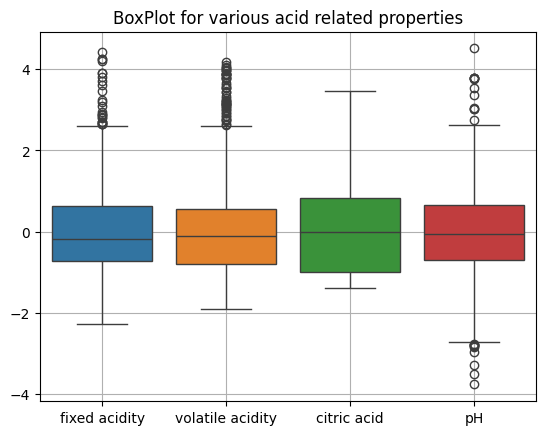

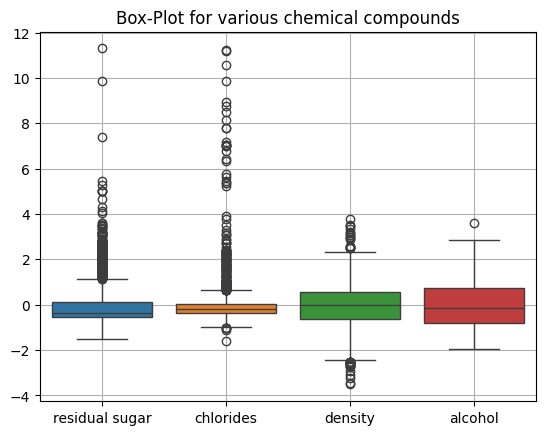

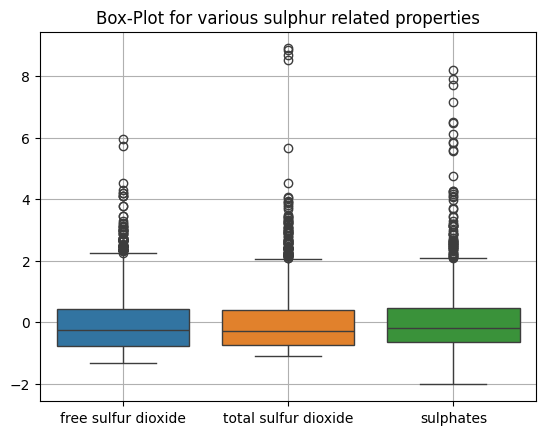

:::Co-relation Matrix:::


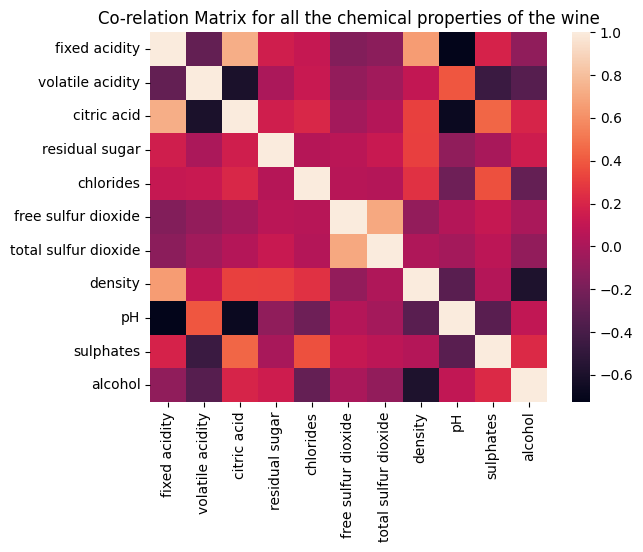

In [18]:
dp.eda()

## Model Training

### Random Forest

In [19]:
hyperparameters_rf = {'n_estimators':100,'criterion':'gini','min_samples_split':3}
rf = modelTraining.ModelTraining(RandomForestClassifier(),hyperparameters_rf)

In [20]:
numerical_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [21]:
rf.train_model(train_data[numerical_cols], train_data[target_col])

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [22]:
y_pred_rf = rf.predict(test_data[numerical_cols])

### Decision Tree

In [23]:
hyperparameters_dt = {'criterion':'gini','min_samples_split':3}
dt = modelTraining.ModelTraining(DecisionTreeClassifier(),hyperparameters_dt)
dt.train_model(train_data[numerical_cols], train_data[target_col])
y_pred_dt = dt.predict(test_data[numerical_cols])

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


### Ada Boost

In [30]:
hyperparameters_ab = {}
ab = modelTraining.ModelTraining(AdaBoostClassifier(),hyperparameters_ab)
ab.train_model(train_data[numerical_cols], train_data[target_col])
y_pred_ab = ab.predict(test_data[numerical_cols])

{'algorithm': 'SAMME.R', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}


### Gradient Boost

In [31]:
hyperparameters_gb = {}
gb = modelTraining.ModelTraining(GradientBoostingClassifier(),hyperparameters_gb)
gb.train_model(train_data[numerical_cols], train_data[target_col])
y_pred_gb = gb.predict(test_data[numerical_cols])

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


### XG Boost

In [32]:
hyperparameters_xgb = {'booster' : 'dart', 'eta' : 0.19, 'max_depth' : 8}
xgb = modelTraining.ModelTraining(XGBClassifier(),hyperparameters_xgb)
xgb.train_model(train_data[numerical_cols], train_data[target_col])
y_pred_xgb = xgb.predict(test_data[numerical_cols])

{'objective': 'binary:logistic', 'base_score': None, 'booster': 'dart', 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 8, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'eta': 0.19}


## Model Evaluation

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       120
           1       0.98      0.98      0.98       121
           2       0.69      0.60      0.64       121
           3       0.92      0.92      0.92       121
           4       0.83      0.93      0.88       121
           5       0.96      1.00      0.98       121

    accuracy                           0.86       725
   macro avg       0.85      0.85      0.85       725
weighted avg       0.85      0.86      0.85       725



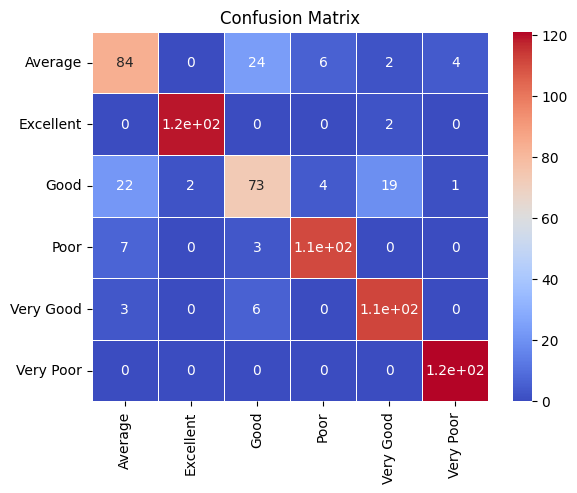

In [34]:
me_rf = modelEvaluation.ModelEvaluation(test_data[target_col], y_pred_rf,class_labels)
me_rf.evaluate()

In [36]:
eval_rf = me_rf.store('Random Forest',pd.DataFrame())

              precision    recall  f1-score   support

           0       0.82      0.52      0.63       120
           1       0.97      0.87      0.92       121
           2       0.57      0.47      0.52       121
           3       0.89      0.83      0.86       121
           4       0.83      0.86      0.85       121
           5       0.60      1.00      0.75       121

    accuracy                           0.76       725
   macro avg       0.78      0.76      0.75       725
weighted avg       0.78      0.76      0.75       725



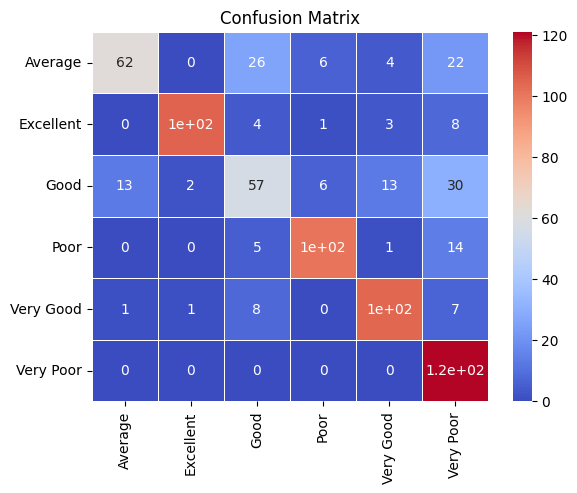

In [38]:
me_dt = modelEvaluation.ModelEvaluation(test_data[target_col], y_pred_dt,class_labels)
me_dt.evaluate()
eval_dt = me_dt.store('Decision Tree',pd.DataFrame())

              precision    recall  f1-score   support

           0       0.62      0.67      0.64       120
           1       0.91      0.92      0.91       121
           2       0.49      0.40      0.44       121
           3       0.82      0.74      0.77       121
           4       0.66      0.79      0.72       121
           5       0.98      1.00      0.99       121

    accuracy                           0.75       725
   macro avg       0.75      0.75      0.75       725
weighted avg       0.75      0.75      0.75       725



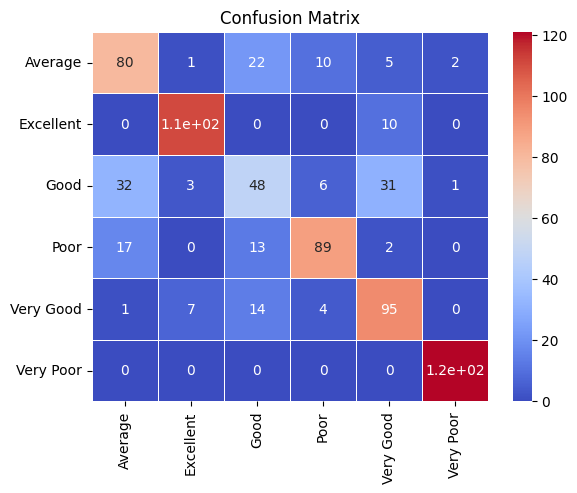

In [39]:
me_ab = modelEvaluation.ModelEvaluation(test_data[target_col], y_pred_ab,class_labels)
me_ab.evaluate()
eval_ab = me_ab.store('Ada Boost',pd.DataFrame())

              precision    recall  f1-score   support

           0       0.62      0.61      0.62       120
           1       0.92      0.97      0.94       121
           2       0.57      0.49      0.53       121
           3       0.90      0.83      0.87       121
           4       0.75      0.85      0.80       121
           5       0.94      1.00      0.97       121

    accuracy                           0.79       725
   macro avg       0.78      0.79      0.79       725
weighted avg       0.79      0.79      0.79       725



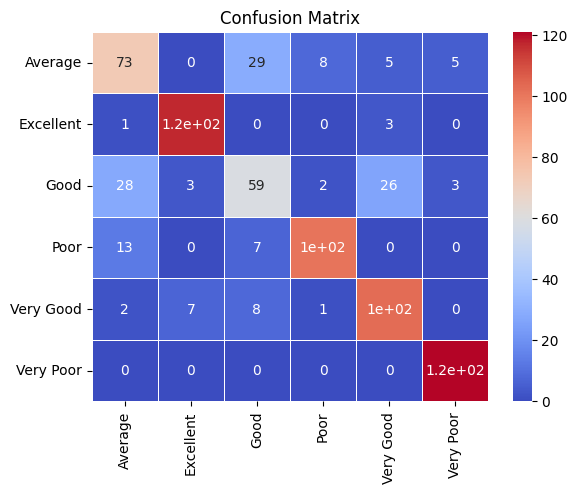

In [40]:
me_gb = modelEvaluation.ModelEvaluation(test_data[target_col], y_pred_gb,class_labels)
me_gb.evaluate()
eval_gb = me_gb.store('Gradient Boost',pd.DataFrame())

              precision    recall  f1-score   support

           0       0.70      0.69      0.69       120
           1       0.94      0.99      0.97       121
           2       0.67      0.60      0.63       121
           3       0.95      0.93      0.94       121
           4       0.83      0.86      0.85       121
           5       0.95      1.00      0.97       121

    accuracy                           0.85       725
   macro avg       0.84      0.85      0.84       725
weighted avg       0.84      0.85      0.84       725



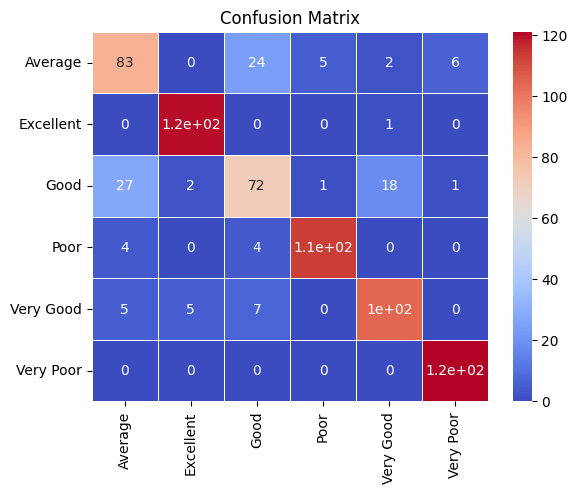

In [41]:
me_xgb = modelEvaluation.ModelEvaluation(test_data[target_col], y_pred_xgb,class_labels)
me_xgb.evaluate()
eval_xgb = me_xgb.store('XG Boost',pd.DataFrame())

In [46]:
final_report = pd.concat([eval_rf,eval_dt,eval_ab,eval_gb,eval_xgb], axis = 1, join = 'inner')
final_report

,Random Forest(Precision),Random Forest(Recall),Random Forest(F1Score),Decision Tree(Precision),Decision Tree(Recall),Decision Tree(F1Score),Ada Boost(Precision),Ada Boost(Recall),Ada Boost(F1Score),Gradient Boost(Precision),Gradient Boost(Recall),Gradient Boost(F1Score),XG Boost(Precision),XG Boost(Recall),XG Boost(F1Score)
Average,72.41,70.00,71.19,81.58,51.67,63.27,61.54,66.67,64.00,62.39,60.83,61.60,69.75,69.17,69.46
Excellent,98.35,98.35,98.35,97.22,86.78,91.70,90.98,91.74,91.36,92.13,96.69,94.35,94.49,99.17,96.77
Good,68.87,60.33,64.32,57.00,47.11,51.58,49.48,39.67,44.04,57.28,48.76,52.68,67.29,59.50,63.16
Poor,91.74,91.74,91.74,88.60,83.47,85.96,81.65,73.55,77.39,90.18,83.47,86.70,94.96,93.39,94.17
Very Good,82.96,92.56,87.50,83.20,85.95,84.55,66.43,78.51,71.97,75.18,85.12,79.84,83.20,85.95,84.55
Very Poor,96.03,100.00,97.98,59.90,100.00,74.92,97.58,100.00,98.78,93.80,100.00,96.80,94.53,100.00,97.19
